# Application of Classification

In this lab you will perform **two-class classification** using **logistic regression**.

In this lab you will learn the following: 
-  How to prepare data for classification models using Scikit-learn. 
-  Constructing a classification model using Scikit-learn.
-  Evaluating the performance of the classification model. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

%matplotlib inline

In [2]:
credit = pd.read_csv('German_Credit_UCI.csv')
credit.columns = ['checking_account_status', 'loan_duration_mo', 'credit_history', 
                  'purpose', 'loan_amount', 'savings_account_balance', 
                  'time_employed_yrs', 'payment_pcnt_income','gender_status', 
                  'other_signators', 'time_in_residence', 'property', 'age_yrs',
                  'other_credit_outstanding', 'home_ownership', 'number_loans', 
                  'job_category', 'dependents', 'telephone', 'foreign_worker', 
                  'bad_credit']
credit.head()

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [3]:
code_list = [['checking_account_status', 
              {'A11' : '< 0 DM', 
               'A12' : '0 - 200 DM', 
               'A13' : '> 200 DM or salary assignment', 
               'A14' : 'none'}],
            ['credit_history',
            {'A30' : 'no credit - paid', 
             'A31' : 'all loans at bank paid', 
             'A32' : 'current loans paid', 
             'A33' : 'past payment delays', 
             'A34' : 'critical account - other non-bank loans'}],
            ['purpose',
            {'A40' : 'car (new)', 
             'A41' : 'car (used)',
             'A42' : 'furniture/equipment',
             'A43' : 'radio/television', 
             'A44' : 'domestic appliances', 
             'A45' : 'repairs', 
             'A46' : 'education', 
             'A47' : 'vacation',
             'A48' : 'retraining',
             'A49' : 'business', 
             'A410' : 'other' }],
            ['savings_account_balance',
            {'A61' : '< 100 DM', 
             'A62' : '100 - 500 DM', 
             'A63' : '500 - 1000 DM', 
             'A64' : '>= 1000 DM',
             'A65' : 'unknown/none' }],
            ['time_employed_yrs',
            {'A71' : 'unemployed',
             'A72' : '< 1 year', 
             'A73' : '1 - 4 years', 
             'A74' : '4 - 7 years', 
             'A75' : '>= 7 years'}],
            ['gender_status',
            {'A91' : 'male-divorced/separated', 
             'A92' : 'female-divorced/separated/married',
             'A93' : 'male-single', 
             'A94' : 'male-married/widowed', 
             'A95' : 'female-single'}],
            ['other_signators',
            {'A101' : 'none', 
             'A102' : 'co-applicant', 
             'A103' : 'guarantor'}],
            ['property',
            {'A121' : 'real estate',
             'A122' : 'building society savings/life insurance', 
             'A123' : 'car or other',
             'A124' : 'unknown-none' }],
            ['other_credit_outstanding',
            {'A141' : 'bank', 
             'A142' : 'stores', 
             'A143' : 'none'}],
             ['home_ownership',
            {'A151' : 'rent', 
             'A152' : 'own', 
             'A153' : 'for free'}],
            ['job_category',
            {'A171' : 'unemployed-unskilled-non-resident', 
             'A172' : 'unskilled-resident', 
             'A173' : 'skilled',
             'A174' : 'highly skilled'}],
            ['telephone', 
            {'A191' : 'none', 
             'A192' : 'yes'}],
            ['foreign_worker',
            {'A201' : 'yes', 
             'A202' : 'no'}],
            ['bad_credit',
            {2 : 1,
             1 : 0}]]

for col_dic in code_list:
    col = col_dic[0]
    dic = col_dic[1]
    credit[col] = [dic[x] for x in credit[col]]
    
credit.head()    

,checking_account_status,loan_duration_mo,credit_history,purpose,loan_amount,savings_account_balance,time_employed_yrs,payment_pcnt_income,gender_status,other_signators,...,property,age_yrs,other_credit_outstanding,home_ownership,number_loans,job_category,dependents,telephone,foreign_worker,bad_credit
0,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,none,...,real estate,22,none,own,1,skilled,1,none,yes,1
1,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,none,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,0
2,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,0
3,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,none,...,unknown-none,53,none,for free,2,skilled,2,none,yes,1
4,none,36,current loans paid,education,9055,unknown/none,1 - 4 years,2,male-single,none,...,unknown-none,35,none,for free,1,unskilled-resident,2,yes,yes,0


In [4]:
credit['dummy'] = [1 for _ in range(credit.shape[0])]

In [5]:
credit[['log_loan_duration_mo', 'log_loan_amount', 'log_age_yrs']] = credit[['loan_duration_mo', 'loan_amount', 'age_yrs']].applymap(math.log)

In [6]:
cat_cols = ['checking_account_status', 'credit_history',
            'purpose', 'savings_account_balance', 'time_employed_yrs', 
            'gender_status', 'other_signators', 'time_in_residence', 
            'property', 'other_credit_outstanding', 'home_ownership', 
            'job_category', 'telephone', 'foreign_worker']
num_cols = credit[['log_loan_duration_mo', 'log_loan_amount', 'log_age_yrs',
            'payment_pcnt_income', 'loan_duration_mo', 'loan_amount', 'payment_pcnt_income', 
            'age_yrs', 'number_loans', 'dependents']]

In [7]:
credit_counts = credit[['credit_history', 'bad_credit']].groupby('bad_credit').count()
print(credit_counts)

            credit_history
bad_credit                
0                      699
1                      300


In [8]:
credit_counts.iloc[0,0]

699

checking_account_status


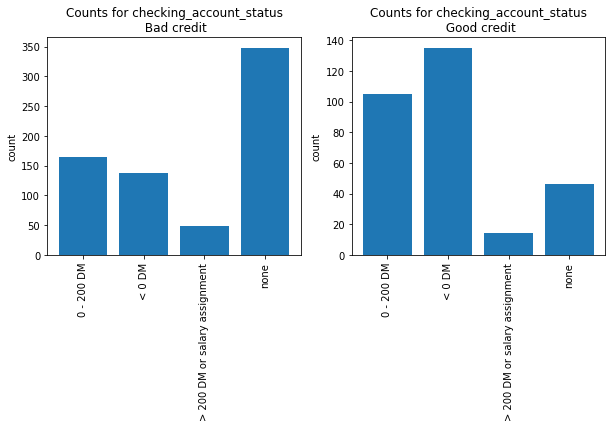

credit_history


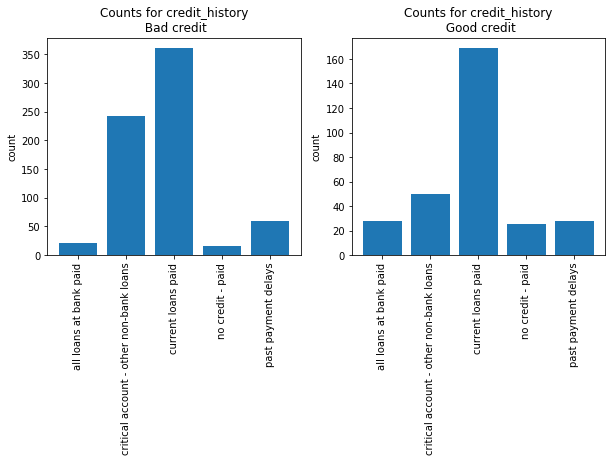

purpose


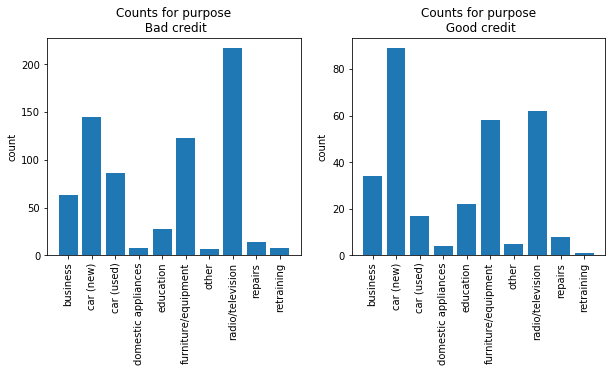

savings_account_balance


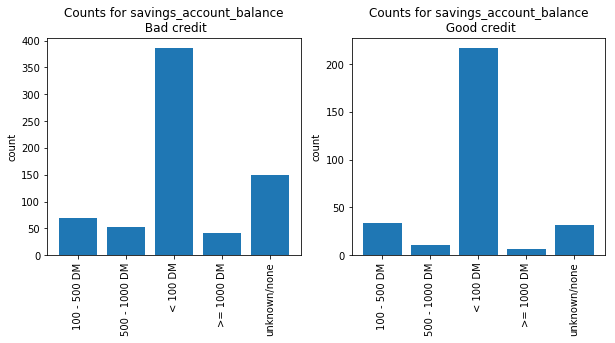

time_employed_yrs


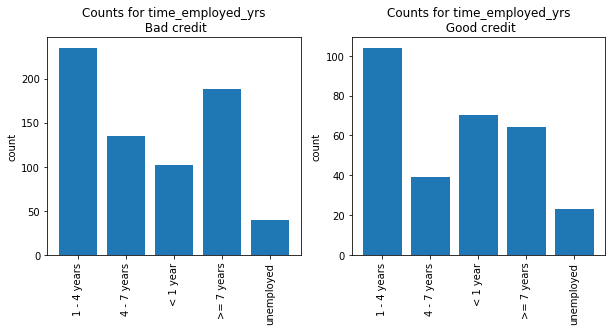

gender_status


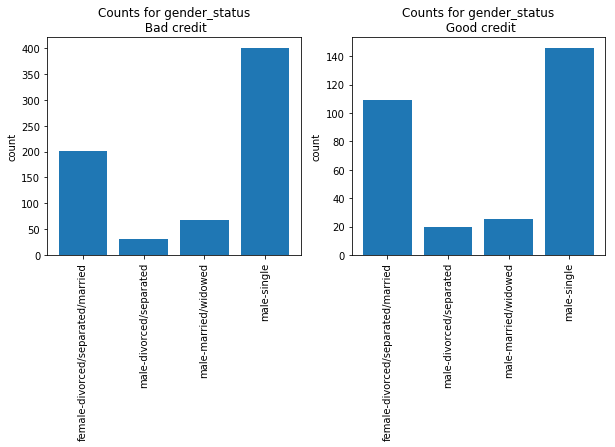

other_signators


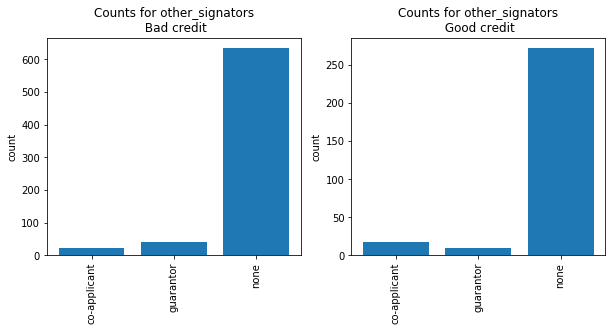

time_in_residence


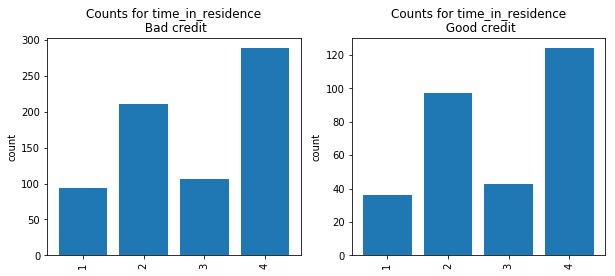

property


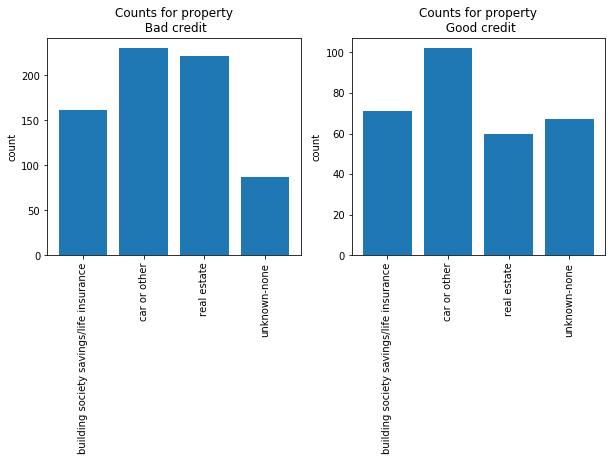

other_credit_outstanding


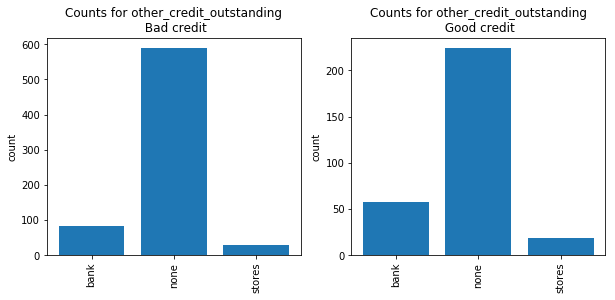

home_ownership


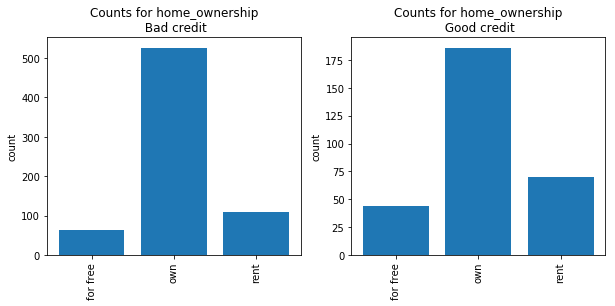

job_category


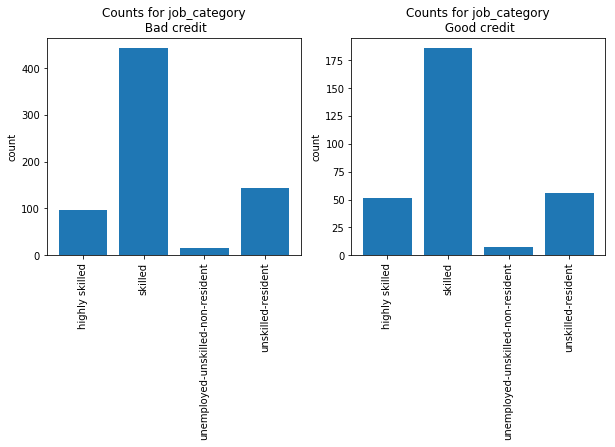

telephone


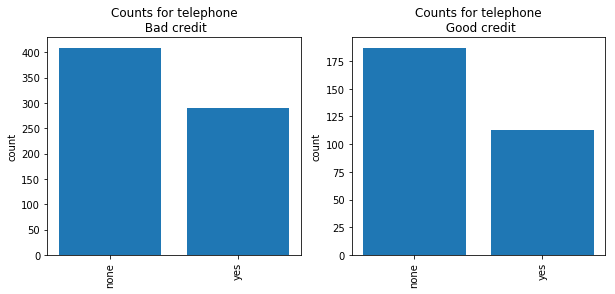

foreign_worker


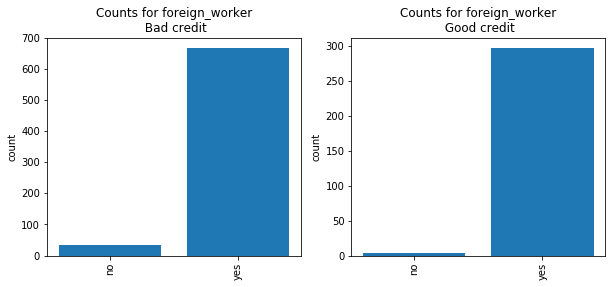

In [9]:
for col in cat_cols:
    print(col)
    counts = credit[['dummy', 'bad_credit', col]].groupby(['bad_credit', col], as_index=False).count()
    temp = counts[counts['bad_credit'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['bad_credit'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Bad credit')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['bad_credit'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Good credit')
    plt.ylabel('count')
    plt.show()

log_loan_duration_mo


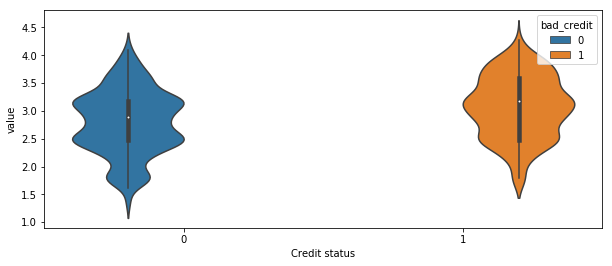

log_loan_amount


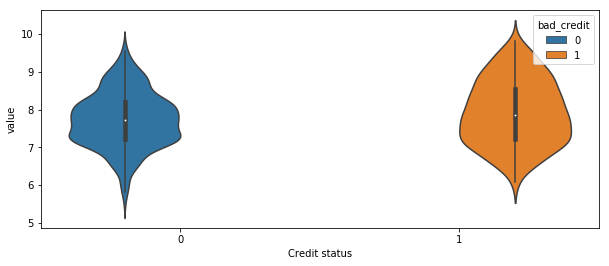

log_age_yrs


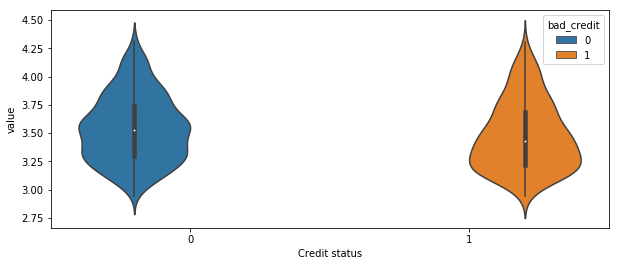

payment_pcnt_income


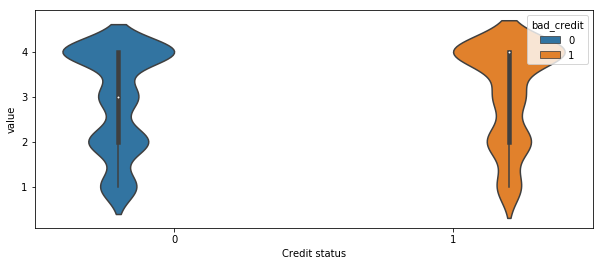

loan_duration_mo


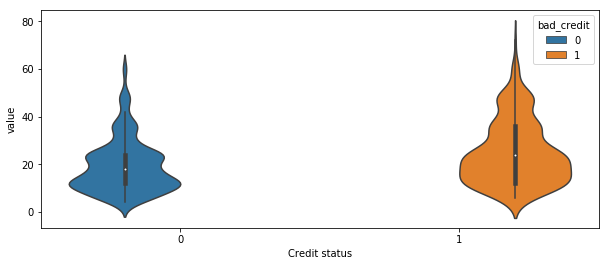

loan_amount


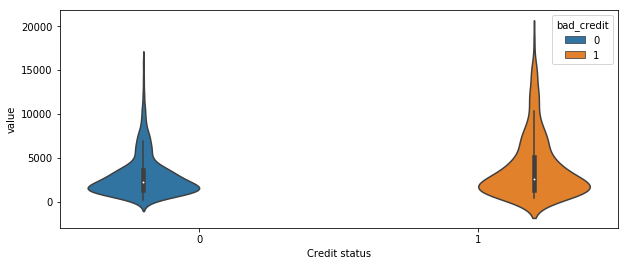

payment_pcnt_income


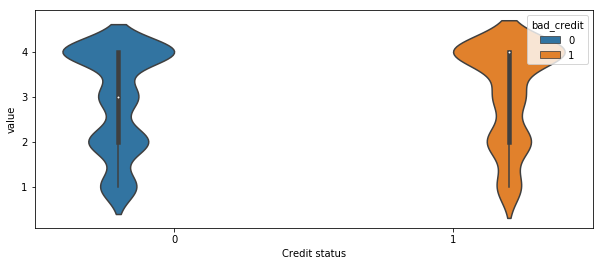

age_yrs


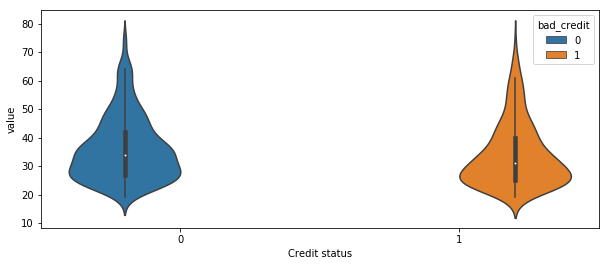

number_loans


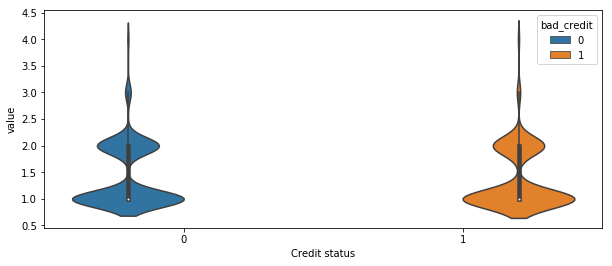

dependents


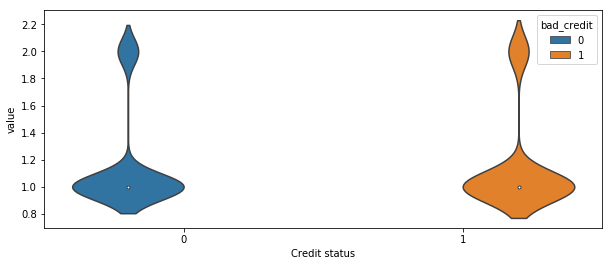

In [10]:
for col in num_cols:
    print(col)
    _ = plt.figure(figsize = (10,4))
    sns.violinplot(x= 'bad_credit', y = col, hue = 'bad_credit', 
                   data = credit)
    plt.ylabel('value')
    plt.xlabel('Credit status')
    plt.show()

log_loan_duration_mo


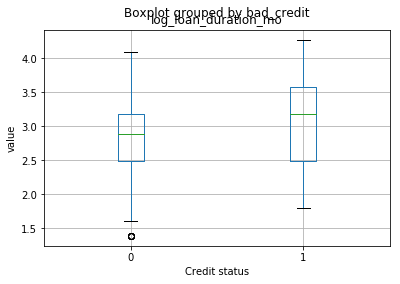

log_loan_amount


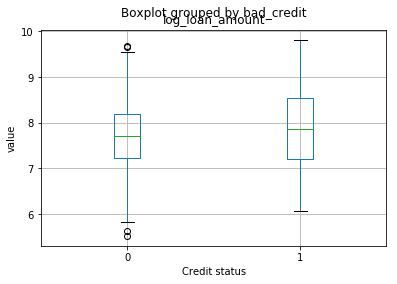

log_age_yrs


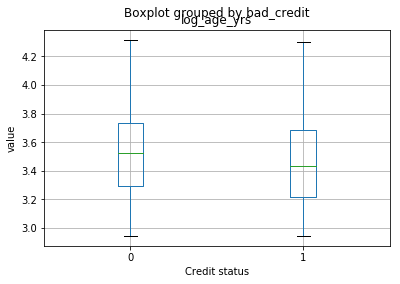

payment_pcnt_income


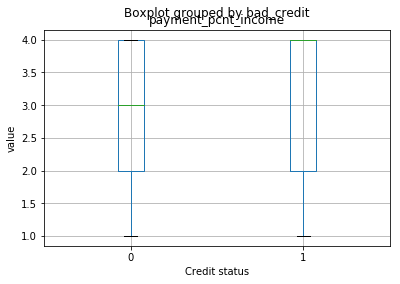

loan_duration_mo


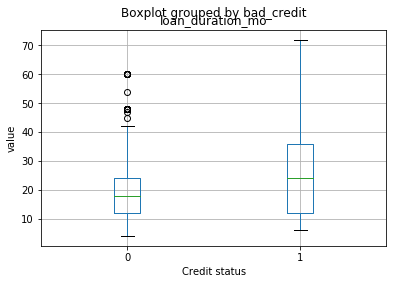

loan_amount


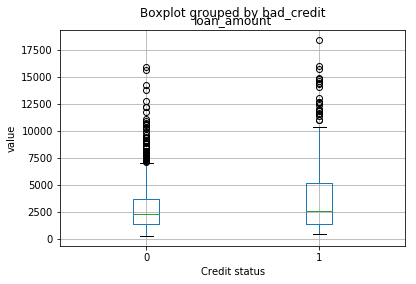

payment_pcnt_income


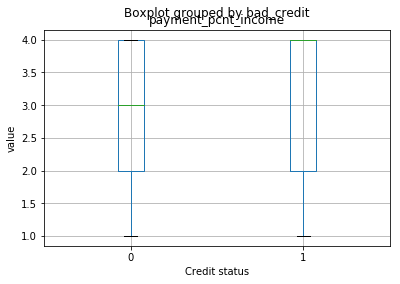

age_yrs


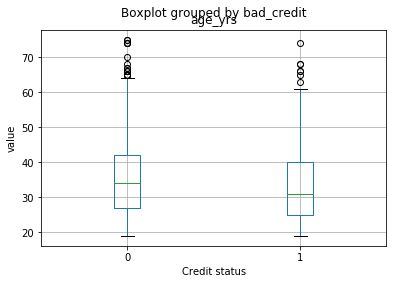

number_loans


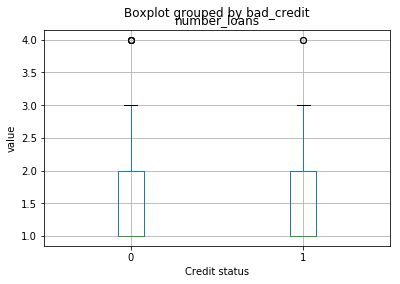

dependents


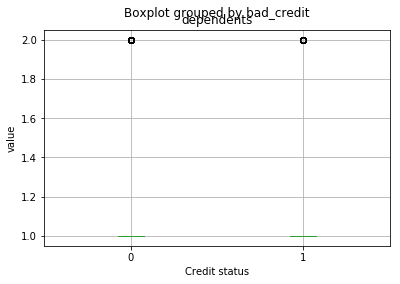

In [11]:
for col in num_cols:
    print(col)
    _ = plt.figure(figsize = (10,4))
    credit.boxplot(col, by = 'bad_credit')
    plt.ylabel('value')
    plt.xlabel('Credit status')
    plt.show()

In [12]:
labels = np.array(credit['bad_credit'])

In [13]:
Features = np.array(credit[['log_loan_duration_mo', 'log_loan_amount', 
                            'payment_pcnt_income', 'log_age_yrs']])
Features = preprocessing.scale(Features)

In [14]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['checking_account_status',  'credit_history', 
                       'purpose', 'gender_status', 'time_in_residence', 
                       'property']

for col in categorical_columns:
    temp = encode_string(credit[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(999, 35)
[[ 1.70862514  1.16203714 -0.86919627 -1.44689656  1.          0.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          1.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          1.          0.        ]
 [-0.67649717 -0.18248204 -0.86919627  1.23153776  0.          0.
   0.          1.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.          0.          0.          1.
   0.          0.          0.          1.          0.        ]]


In [15]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [16]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[-0.26718822]
[[ 0.31087581  0.12334687  0.26014811 -0.22524812  0.23777443  0.91216496
  -0.17683221 -1.24029539  0.28565292 -0.74063777 -0.28917943  0.64272641
  -0.16575035  0.13059645  0.6909723  -0.65080579  0.15429314  0.57492161
  -0.18793133 -0.4417934  -0.38474687  0.33226206 -0.4849564   0.19004411
   0.14582741 -0.05547256 -0.54758719 -0.39543481  0.2208806   0.01141644
  -0.10405045 -0.06156798 -0.13453574 -0.45240987  0.38132537]]


In [18]:
probabilities = logistic_mod.predict_proba(x_test)
print(probabilities[:15,:])

[[0.70165964 0.29834036]
 [0.51877533 0.48122467]
 [0.85695626 0.14304374]
 [0.33488103 0.66511897]
 [0.371275   0.628725  ]
 [0.96379958 0.03620042]
 [0.36304    0.63696   ]
 [0.79883847 0.20116153]
 [0.86723409 0.13276591]
 [0.94423876 0.05576124]
 [0.97084881 0.02915119]
 [0.78799525 0.21200475]
 [0.90902877 0.09097123]
 [0.82560321 0.17439679]
 [0.97022299 0.02977701]]


In [52]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probabilities[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores[:15]))
print(y_test[:15])

[0 0 0 1 1 0 1 0 0 0 0 0 0 0 0]
[1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]


In [95]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('True positive    %6d' % conf[0,0] + '          %5d' % conf[0,1])
    print('True negative    %6d' % conf[1,0] + '          %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('             Positive   Negative')
    print('Num case    %0.2f' % metrics[3][0] + '       %0.2f' % metrics[3][1])
    print('Precision   %0.2f' % metrics[0][0] + '          %0.2f' % metrics[0][1])
    print('Recall      %0.2f' % metrics[1][0] + '          %0.2f' % metrics[1][1])
    print('F1          %0.2f' % metrics[2][0] + '          %0.2f' % metrics[2][1])


    
print_metrics(y_test, scores)    

                 Confusion matrix
                 Score positive    Score negative
True positive       177             28
True negative        55             40

Accuracy  0.72
 
             Positive   Negative
Num case    205.00       95.00
Precision   0.76          0.59
Recall      0.86          0.42
F1          0.81          0.49


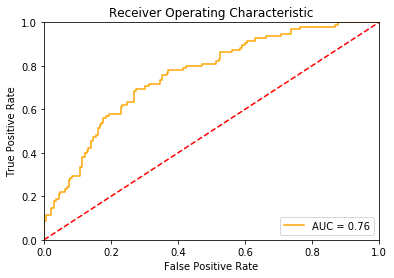

In [96]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

In [97]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.45
                 Confusion matrix
                 Score positive    Score negative
True positive       170             35
True negative        44             51

Accuracy  0.74
 
             Positive   Negative
Num case    205.00       95.00
Precision   0.79          0.59
Recall      0.83          0.54
F1          0.81          0.56

For threshold = 0.4
                 Confusion matrix
                 Score positive    Score negative
True positive       161             44
True negative        40             55

Accuracy  0.72
 
             Positive   Negative
Num case    205.00       95.00
Precision   0.80          0.56
Recall      0.79          0.58
F1          0.79          0.57

For threshold = 0.35
                 Confusion matrix
                 Score positive    Score negative
True positive       154             51
True negative        35             60

Accuracy  0.71
 
             Positive   Negative
Num case    205.00       95.00
Precision   0.81 